# Format image


If the input is a frame of a video run the following cell

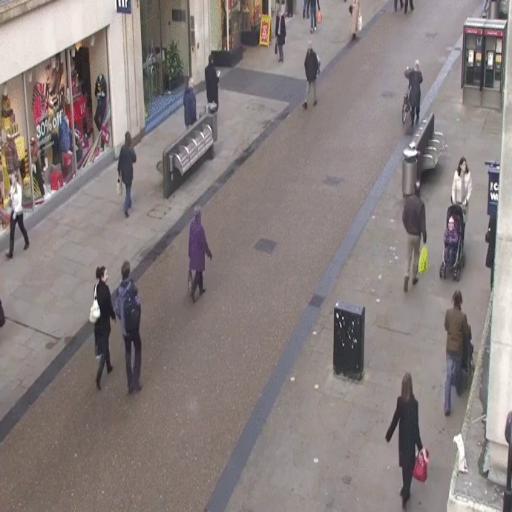

In [ ]:
from skimage import io, draw
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

cap = cv2.VideoCapture('/content/sd.mp4')
ret, image = cap.read()
image = cv2.resize(image, (512, 512))
cv2.imwrite('frame1.jpg', image)
cv2_imshow(image)

Run this cell if you're input is an image

In [ ]:
image = cv2.imread('filename.jpeg')
image = cv2.resize(image, (512, 512))
cv2.imwrite('frame1.jpg', image)
cv2_imshow(image)

In [ ]:
ht, wd, cc= image.shape

# Entry of floor coordinates

Note : Floor coordinates must only be obtained from a 512x512 size image

In [ ]:
# modify number of zones, etc over here
zones = 4
cx1 = 3 #lb
cy1 = 236
cx2 = 441 #rb
cy2 = 509
cx4 = 293 #lu
cy4 = 1
cx3 = 503 #ru
cy3 = 1
orientation = True #vertical = True horizontal = False

Run the following cells for processing

In [ ]:
from scipy.spatial import distance
d1 = distance.euclidean((cx1, cy1), (cx2, cy2))
d2 = distance.euclidean((cx3, cy3), (cx2, cy2))
d3 = distance.euclidean((cx3, cy3), (cx4, cy4))
d4 = distance.euclidean((cx1, cy1), (cx4, cy4))
print(d1, d2, d3, d4)
#line 1-4 will be direction in which ppl walk

In [ ]:
max_len = 0
if (d4>=d1 and d4>=d2 and d4>=d3):
  max_len= d4
elif (d3>=d1 and d3>=d2 and d3>=d4):
  max_len= d3
elif (d2>=d1 and d2>=d3 and d2>=d4):
  max_len= d2
elif (d1>=d4 and d1>=d2 and d1>=d3):
  max_len= d1

In [ ]:
def pointaboveline(m, c, y1, x1):
  if (y1 >= (m*x1 + c)):
    return true
  return false

In [ ]:
def pointbelowline(m, c, y1, x1):
  if (y1 <= (m*x1 + c)):
    return true
  return false

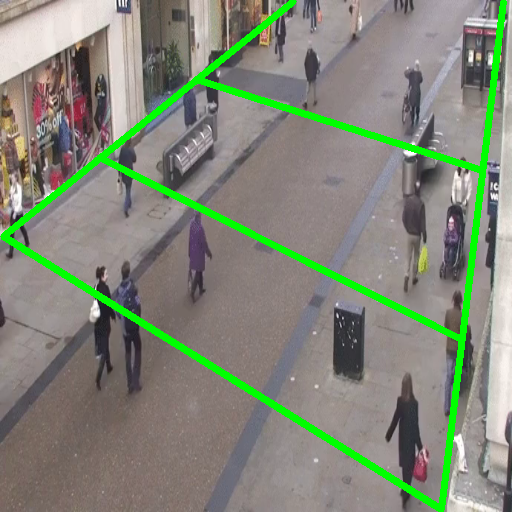

In [ ]:
zones = 4
m1 = (cy2 - cy1) / (cx2 - cx1)
div2a_x = (cx1 * 2 + cx4) / (zones-1)
div2a_y = (cy1 * 2 + cy4) / (zones-1)
#div2a_c = div2_y - m1 * div2_x
#blehy = 20*m1 + div2_c

div3a_x = (cx4 * 2 + cx1) / (zones-1)
div3a_y = (cy4 * 2 + cy1) / 3
#div3a_c = div3_y - m1 * div3_x

m1 = (cy2 - cy1) / (cx2 - cx1)
div2b_x = (cx2 * 2 + cx3) / (zones-1)
div2b_y = (cy2 * 2 + cy3) / (zones-1)
#div2b_c = div2b_y - m1 * div2b_x
#blehy = 20*m1 + div2_c

div3b_x = (cx3 * 2 + cx2) / (zones-1)
div3b_y = (cy3 * 2 + cy2) / (zones-1)
#div3b_c = div3b_y - m1 * div3b_x

color = (0, 255, 0) 
thickness = 5
image = cv2.line(image, (int(div3b_x), int(div3b_y)), (int(div3a_x), int(div3a_y)), color, thickness) 
image = cv2.line(image, (int(div2a_x), int(div2a_y)), (int(div2b_x), int(div2b_y)), color, thickness) 

#image = cv2.line(image, (int(div2_x), int(div2_y)), (int(20), int(blehy)), color, thickness) 
image = cv2.line(image, (int(cx1), int(cy1)), (int(cx4), int(cy4)), color, thickness) 
image = cv2.line(image, (int(cx2), int(cy2)), (int(cx3), int(cy3)), color, thickness) 
image = cv2.line(image, (int(cx1), int(cy1)), (int(cx2), int(cy2)), color, thickness) 


cv2_imshow(image)

# Output

Copy paste this o/p to floor.coordinates.txt

In [ ]:

print(zones)
print(wd, ht)
print(cx1, cy1, cx2, cy2)
print(cx4, cy4, cx3, cy3)
m1 = (cy2 - cy1) / (cx2 - cx1)
c1 = cy1 - m1 * cx1 
print(int(cx1), int(cy1), int(cx2), int(cy2), (m1), (c1))

m2 = (div2b_y - div2a_y) / (div2b_x - div2a_x)
c2 = div2b_y - m2 * div2b_x
print(int(div2a_x), int(div2a_y), int(div2b_x), int(div2b_y), (m2), (c2))

m3 = (div3b_y - div3a_y)/(div3b_x - div3a_x)
c3 = div3b_y - m3 * div3b_x
print(int(div3a_x), int(div3a_y), int(div3b_x), int(div3b_y), m3, c3)



4
512 512
3 236 441 509
3 236 441 509 0.6232876712328768 234.13013698630138
99 157 461 339 0.5027624309392266 107.55801104972375
196 79 482 170 0.31818181818181823 16.863636363636346
293 1 503 1
